# Employee Salary Prediction  
Using: Linear Regression  
       Support Vector Regression  
       Random Forest Regression  
Deployment: Streamlit

# Step 1: load the dataset

In [172]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Shagufta Umme\Downloads\employee_attrition_data.csv")

# Step:2  
# Take a look at the dataset

In [173]:
print(df)

     Employee_ID  Age  Gender   Department      Job_Title  Years_at_Company  \
0              0   27    Male    Marketing        Manager                 9   
1              1   53  Female        Sales       Engineer                10   
2              2   59  Female    Marketing        Analyst                 8   
3              3   42  Female  Engineering        Manager                 1   
4              4   44  Female        Sales       Engineer                10   
..           ...  ...     ...          ...            ...               ...   
995          995   39  Female           HR  HR Specialist                 3   
996          996   50    Male  Engineering        Manager                 1   
997          997   52    Male  Engineering        Analyst                 3   
998          998   37  Female           HR  HR Specialist                 2   
999          999   59    Male        Sales  HR Specialist                 1   

     Satisfaction_Level  Average_Monthly_Hours  Pro

In [174]:
print(df.head(10))


   Employee_ID  Age  Gender   Department      Job_Title  Years_at_Company  \
0            0   27    Male    Marketing        Manager                 9   
1            1   53  Female        Sales       Engineer                10   
2            2   59  Female    Marketing        Analyst                 8   
3            3   42  Female  Engineering        Manager                 1   
4            4   44  Female        Sales       Engineer                10   
5            5   47    Male        Sales  HR Specialist                10   
6            6   58    Male    Marketing  HR Specialist                 5   
7            7   57  Female        Sales        Analyst                 8   
8            8   34  Female      Finance     Accountant                 6   
9            9   57  Female    Marketing       Engineer                 7   

   Satisfaction_Level  Average_Monthly_Hours  Promotion_Last_5Years  Salary  \
0            0.586251                    151                      0   601

In [175]:
print(df.tail(10))

     Employee_ID  Age  Gender   Department      Job_Title  Years_at_Company  \
990          990   36  Female  Engineering     Accountant                 9   
991          991   47    Male    Marketing        Manager                 2   
992          992   46  Female           HR        Analyst                 8   
993          993   47  Female           HR        Analyst                 5   
994          994   47    Male    Marketing  HR Specialist                 2   
995          995   39  Female           HR  HR Specialist                 3   
996          996   50    Male  Engineering        Manager                 1   
997          997   52    Male  Engineering        Analyst                 3   
998          998   37  Female           HR  HR Specialist                 2   
999          999   59    Male        Sales  HR Specialist                 1   

     Satisfaction_Level  Average_Monthly_Hours  Promotion_Last_5Years  Salary  \
990            0.558512                    182   

In [176]:
print(df.columns)

Index(['Employee_ID', 'Age', 'Gender', 'Department', 'Job_Title',
       'Years_at_Company', 'Satisfaction_Level', 'Average_Monthly_Hours',
       'Promotion_Last_5Years', 'Salary', 'Attrition'],
      dtype='object')


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee_ID            1000 non-null   int64  
 1   Age                    1000 non-null   int64  
 2   Gender                 1000 non-null   object 
 3   Department             1000 non-null   object 
 4   Job_Title              1000 non-null   object 
 5   Years_at_Company       1000 non-null   int64  
 6   Satisfaction_Level     1000 non-null   float64
 7   Average_Monthly_Hours  1000 non-null   int64  
 8   Promotion_Last_5Years  1000 non-null   int64  
 9   Salary                 1000 non-null   int64  
 10  Attrition              1000 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 86.1+ KB


# Step 3: Check Missing Values

In [178]:
df.isna()

,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False


In [179]:
df.isna().sum()

Employee_ID              0
Age                      0
Gender                   0
Department               0
Job_Title                0
Years_at_Company         0
Satisfaction_Level       0
Average_Monthly_Hours    0
Promotion_Last_5Years    0
Salary                   0
Attrition                0
dtype: int64

# Step 4: Check for duplicate values

In [180]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [181]:
df.duplicated().sum()

0

# Step 5: Remove unwanted columns

In [182]:
print(df.head)

<bound method NDFrame.head of      Employee_ID  Age  Gender   Department      Job_Title  Years_at_Company  \
0              0   27    Male    Marketing        Manager                 9   
1              1   53  Female        Sales       Engineer                10   
2              2   59  Female    Marketing        Analyst                 8   
3              3   42  Female  Engineering        Manager                 1   
4              4   44  Female        Sales       Engineer                10   
..           ...  ...     ...          ...            ...               ...   
995          995   39  Female           HR  HR Specialist                 3   
996          996   50    Male  Engineering        Manager                 1   
997          997   52    Male  Engineering        Analyst                 3   
998          998   37  Female           HR  HR Specialist                 2   
999          999   59    Male        Sales  HR Specialist                 1   

     Satisfaction_Lev

In [183]:
df.drop(columns="Employee_ID",inplace=True)

In [184]:
df.head()

,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


In [185]:
!pip install matplotlib

In [186]:
import matplotlib.pyplot as plt

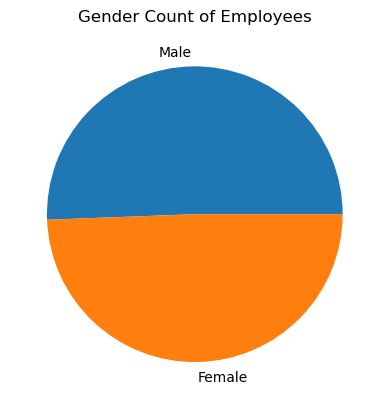

In [187]:
df['Gender'].value_counts().plot(kind='pie')
plt.ylabel("")
plt.title("Gender Count of Employees")
plt.show()

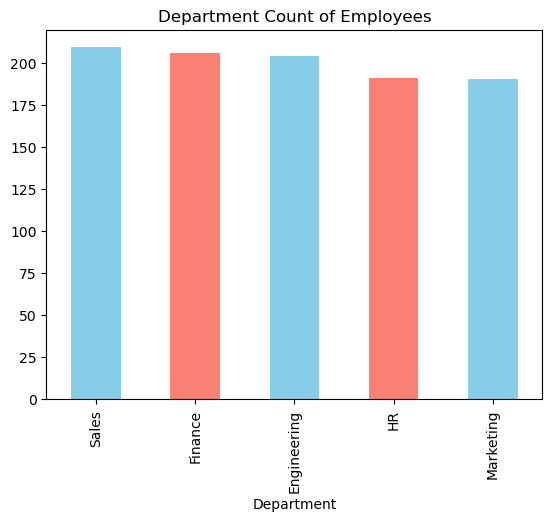

In [188]:
df['Department'].value_counts().plot(kind='bar',color=['skyblue', 'salmon'])
plt.ylabel("")
plt.title("Department Count of Employees")
plt.show()

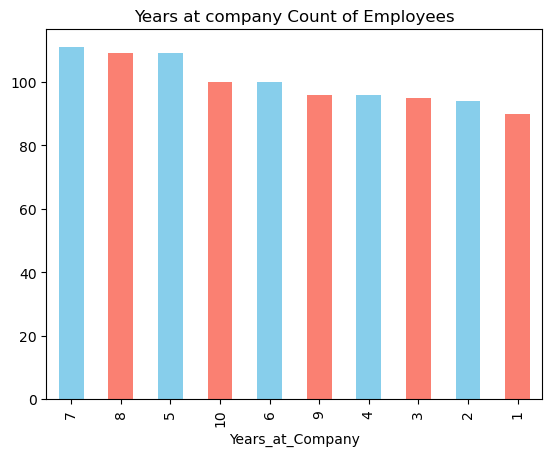

In [189]:
df['Years_at_Company'].value_counts().plot(kind='bar',color=['skyblue', 'salmon'])
plt.ylabel("")
plt.title("Years at company Count of Employees")
plt.show()

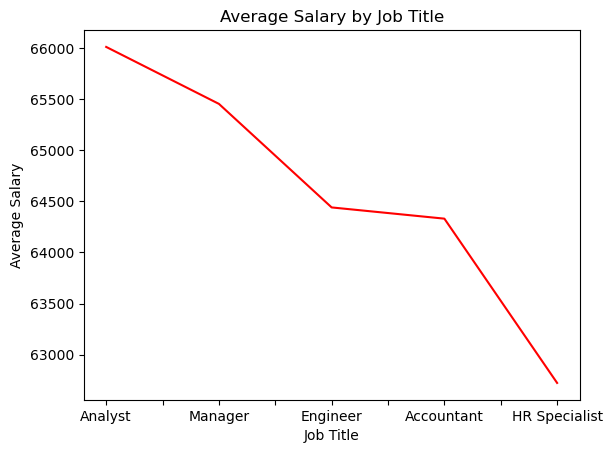

In [190]:
df.groupby('Job_Title')["Salary"].mean().sort_values(ascending=False).plot(kind="line",color='red')
plt.title("Average Salary by Job Title")
plt.xlabel("Job Title")
plt.ylabel("Average Salary")
plt.show()

In [191]:
df.groupby(["Department","Promotion_Last_5Years"])["Salary"].mean().reset_index()

,Department,Promotion_Last_5Years,Salary
0,Engineering,0,65541.063636
1,Engineering,1,62424.127660
2,Finance,0,63390.145299
3,Finance,1,62041.269663
4,HR,0,63012.556701
5,HR,1,65882.861702
6,Marketing,0,65251.597826
7,Marketing,1,66018.632653
8,Sales,0,64295.846939
9,Sales,1,67838.756757


In [192]:
df.head()

,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


In [193]:
df.describe()

,Age,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,42.205000,5.605000,0.505995,199.493000,0.486000,64624.980000,0.495000
std,10.016452,2.822223,0.289797,29.631908,0.500054,20262.984333,0.500225
min,25.000000,1.000000,0.001376,150.000000,0.000000,30099.000000,0.000000
25%,33.000000,3.000000,0.258866,173.000000,0.000000,47613.500000,0.000000
50%,43.000000,6.000000,0.505675,201.000000,0.000000,64525.000000,0.000000
75%,51.000000,8.000000,0.761135,225.000000,1.000000,81921.000000,1.000000
max,59.000000,10.000000,0.999979,249.000000,1.000000,99991.000000,1.000000


In [194]:
df.columns

Index(['Age', 'Gender', 'Department', 'Job_Title', 'Years_at_Company',
       'Satisfaction_Level', 'Average_Monthly_Hours', 'Promotion_Last_5Years',
       'Salary', 'Attrition'],
      dtype='object')

In [195]:
#split into features and target
x=df[["Years_at_Company","Satisfaction_Level","Average_Monthly_Hours"]]
y=df["Salary"]

In [196]:
!pip install scikit-learn

In [197]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [198]:
x

,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours
0,9,0.586251,151
1,10,0.261161,221
2,8,0.304382,184
3,1,0.480779,242
4,10,0.636244,229
...,...,...,...
995,3,0.377435,239
996,1,0.431152,154
997,3,0.647102,206
998,2,0.304813,241


In [199]:
y

0      60132
1      79947
2      46958
3      40662
4      74307
       ...  
995    71403
996    30181
997    64143
998    74383
999    73220
Name: Salary, Length: 1000, dtype: int64

In [200]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)

In [201]:
x_train

array([[-0.18322358, -1.24296716, -1.14867311],
       [-0.88792964, -0.43441758,  0.75565118],
       [ 0.16912945, -1.01454925, -0.16250517],
       ...,
       [-0.53557661, -1.09074091, -1.01264995],
       [-0.53557661,  1.30099925, -0.29852834],
       [-0.53557661,  0.21543968, -1.5907484 ]])

In [202]:
import joblib
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [203]:
x_test=scaler.fit_transform(x_test)

In [204]:
x_test

array([[ 0.38725115,  1.65986104, -1.19505306],
       [ 1.48843925, -1.50444093, -1.52381594],
       [-0.71393695, -1.27212534,  1.46792625],
       [ 0.02018845, -0.22555906,  1.63230769],
       [ 1.12137655,  1.43937984, -0.96491905],
       [-1.08099966, -0.88675481,  1.10628709],
       [ 1.12137655,  1.03980987, -1.39231079],
       [-0.71393695,  0.44150889, -0.40602216],
       [ 1.12137655,  0.06658033, -0.96491905],
       [ 1.48843925, -0.4869066 ,  0.15287474],
       [ 0.38725115, -0.10898363, -0.93204276],
       [ 0.02018845,  0.80419868,  1.13916338],
       [ 1.12137655,  0.36512571, -1.52381594],
       [ 0.02018845,  0.5471    , -0.0115067 ],
       [-1.81512506, -0.7207862 , -1.39231079],
       [ 0.75431385, -0.48633254, -0.20876443],
       [-0.34687425, -0.00862919, -0.274517  ],
       [ 1.12137655,  1.65569447,  1.30354481],
       [ 0.75431385,  0.74185359,  0.38300875],
       [ 0.02018845,  0.98900922, -0.24164072],
       [ 1.12137655, -1.66020621, -0.669

In [205]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
def results(predictions):
            print("Mean Absolute error on model is {}",format(mean_absolute_error(y_test,predictions)))
            print("Root mean squared error on model is {}",format(np.sqrt(mean_squared_error(y_test,predictions))))

In [206]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [207]:
predictionlr=lr.predict(x_test)

In [208]:
results(predictionlr)

Mean Absolute error on model is {} 18003.984181065134
Root mean squared error on model is {} 20739.685049398595


# Support Vector Regression (SVR)

In [209]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [210]:
svrmodel=SVR()

In [211]:
param_gridsvr={
    'C':[0.1,1,10],
    'epsilon':[0.1,0.2,0.5],
    'kernel':['linear','poly','rbf'],
    'degree':[2,3,4]
}

In [212]:
gridsvr=GridSearchCV(svrmodel,param_gridsvr)

In [213]:
gridsvr.fit(x_train,y_train.values.ravel())

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                         'epsilon': [0.1, 0.2, 0.5],
                         'kernel': ['linear', 'poly', 'rbf']})

In [214]:
gridsvr.best_params_

{'C': 10, 'degree': 2, 'epsilon': 0.5, 'kernel': 'linear'}

In [215]:
predictionsvr=gridsvr.predict(x_test)

In [216]:
results(predictionsvr)

Mean Absolute error on model is {} 18063.040963859767
Root mean squared error on model is {} 20778.26328715396


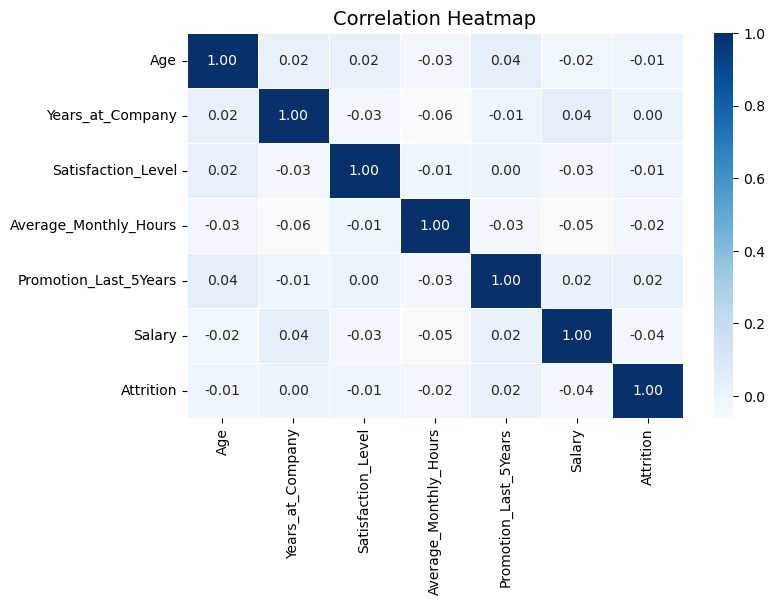

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues',fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


In [218]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rfmodel=RandomForestRegressor()

In [219]:
param_gridrfr={
    "n_estimators":[2,3,4,5,6],
    "max_depth":[5,10,15]
}

In [220]:
gridrfr=GridSearchCV(estimator=rfmodel,param_grid=param_gridrfr,cv=5)

In [221]:
gridrfr.fit(x_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [2, 3, 4, 5, 6]})

In [222]:
gridrfr.best_params_

{'max_depth': 5, 'n_estimators': 5}

In [223]:
predictionofrfr=gridrfr.predict(x_test)

In [224]:
results(predictionofrfr)

Mean Absolute error on model is {} 18640.4473739581
Root mean squared error on model is {} 21452.65688529777


In [225]:
gridrfr

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [2, 3, 4, 5, 6]})

In [226]:
joblib.dump(gridrfr,"model.pkl")

['model.pkl']

In [227]:
x.columns

Index(['Years_at_Company', 'Satisfaction_Level', 'Average_Monthly_Hours'], dtype='object')

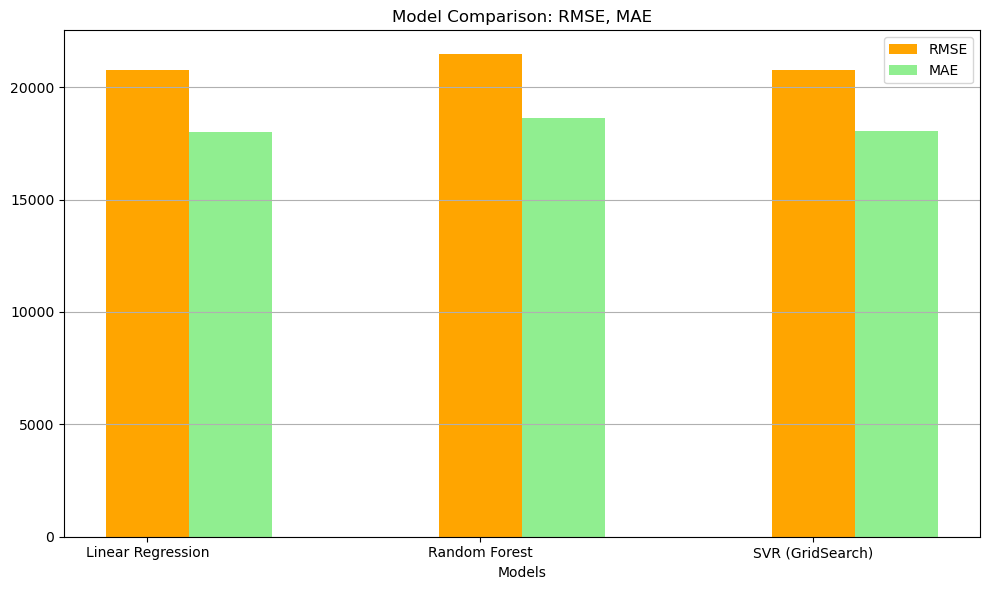

In [228]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

metrics = {
    'Linear Regression': [
        np.sqrt(mean_squared_error(y_test, predictionlr)),
        mean_absolute_error(y_test, predictionlr)
    ],
    'Random Forest': [
        np.sqrt(mean_squared_error(y_test, predictionofrfr)),
        mean_absolute_error(y_test, predictionofrfr)
    ],
    'SVR (GridSearch)': [
        np.sqrt(mean_squared_error(y_test, predictionsvr)),
        mean_absolute_error(y_test, predictionsvr)
    ]
}

models = list(metrics.keys())
rmse = [metrics[m][0] for m in models]
mae = [metrics[m][1] for m in models]

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x, rmse, width, label='RMSE', color='orange')
plt.bar(x + width, mae, width, label='MAE', color='lightgreen')

plt.xlabel('Models')
plt.title('Model Comparison: RMSE, MAE')
plt.xticks(x, models)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()
